In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function


In [2]:
vehicle_df = pd.read_csv("data.csv")  
vehicle_df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [3]:
vehicle_df.shape

(398, 9)

In [4]:
vehicle_df.head(10)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
5,1,8,429.0,198,4341,10.0,1970,ford galaxie 500,6.377156
6,1,8,454.0,220,4354,9.0,1970,chevrolet impala,5.952012
7,1,8,440.0,215,4312,8.5,1970,plymouth fury iii,5.952012
8,1,8,455.0,225,4425,10.0,1970,pontiac catalina,5.952012
9,1,8,390.0,190,3850,8.5,1970,amc ambassador dpl,6.377156


In [5]:
vehicle_df.tail(10)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
388,1,4,156.0,92,2585,14.5,1982,chrysler lebaron medallion,11.053736
389,1,6,232.0,112,2835,14.7,1982,ford granada l,9.353162
390,3,4,144.0,96,2665,13.9,1982,toyota celica gt,13.604599
391,1,4,135.0,84,2370,13.0,1982,dodge charger 2.2,15.305173
392,1,4,151.0,90,2950,17.3,1982,chevrolet camaro,11.478880
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024
397,1,4,119.0,82,2720,19.4,1982,chevy s-10,13.179455


In [6]:
vehicle_df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

### Exploratory Data analysis

In [7]:
# Also replacing the categorical var with actual values
vehicle_df['origin'] = vehicle_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
vehicle_df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,america,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,america,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,america,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,america,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,america,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [8]:
vehicle_df = pd.get_dummies(vehicle_df, columns=['origin'])
vehicle_df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,origin_america,origin_asia,origin_europe
0,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587,1,0,0
1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156,1,0,0
2,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587,1,0,0
3,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299,1,0,0
4,8,302.0,140,3449,10.5,1970,ford torino,7.227443,1,0,0


In [9]:
#A quick summary of the data columns
vehicle_df.describe()

,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073,0.625628,0.198492,0.175879
std,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917,0.484569,0.399367,0.381197
min,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293,0.000000,0.000000,0.000000
25%,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015,0.000000,0.000000,0.000000
50%,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305,1.000000,0.000000,0.000000
75%,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168,1.000000,0.000000,0.000000
max,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697,1.000000,1.000000,1.000000


In [10]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
vehicle_df.dtypes

cylinders                int64
displacement           float64
horsepower              object
weight                   int64
acceleration           float64
year                     int64
name                    object
Kilometer_per_liter    float64
origin_america           uint8
origin_asia              uint8
origin_europe            uint8
dtype: object

In [11]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(vehicle_df.horsepower.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
vehicle_df[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false


,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,origin_america,origin_asia,origin_europe
32,4,98.0,?,2046,19.0,1971,ford pinto,10.628593,1,0,0
126,6,200.0,?,2875,17.0,1974,ford maverick,8.928018,1,0,0
330,4,85.0,?,1835,17.3,1980,renault lecar deluxe,17.388378,0,0,1
336,4,140.0,?,2905,14.3,1980,ford mustang cobra,10.033391,1,0,0
354,4,100.0,?,2320,15.8,1981,renault 18i,14.667458,0,0,1
374,4,151.0,?,3035,20.5,1982,amc concord dl,9.778305,1,0,0


In [12]:
vehicle_df.isnull().sum()

cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
origin_america         0
origin_asia            0
origin_europe          0
dtype: int64

In [13]:
# Missing values have a'?''
# Replace missing values with NaN
vehicle_df = vehicle_df.replace('?', np.nan)
vehicle_df[hpIsDigit['horsepower'] == False] 

,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter,origin_america,origin_asia,origin_europe
32,4,98.0,NaN,2046,19.0,1971,ford pinto,10.628593,1,0,0
126,6,200.0,NaN,2875,17.0,1974,ford maverick,8.928018,1,0,0
330,4,85.0,NaN,1835,17.3,1980,renault lecar deluxe,17.388378,0,0,1
336,4,140.0,NaN,2905,14.3,1980,ford mustang cobra,10.033391,1,0,0
354,4,100.0,NaN,2320,15.8,1981,renault 18i,14.667458,0,0,1
374,4,151.0,NaN,3035,20.5,1982,amc concord dl,9.778305,1,0,0


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations

In [14]:
#instead of dropping the rows, lets replace the missing values with median value. 
vehicle_df.median()

cylinders                 4.000000
displacement            148.500000
horsepower               93.500000
weight                 2803.500000
acceleration             15.500000
year                   1976.000000
Kilometer_per_liter       9.778305
origin_america            1.000000
origin_asia               0.000000
origin_europe             0.000000
dtype: float64

In [15]:
#dropping/ignoring car_name 
vehicle_df = vehicle_df.drop('name', axis=1)


In [1]:
# replace the missing values with median value
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
vehicle_df = vehicle_df.apply(medianFiller,axis=0)

vehicle_df['horsepower'] = vehicle_df['horsepower'].astype('float64')  # converting the hp column from object / string type to float

NameError: name 'vehicle_df' is not defined

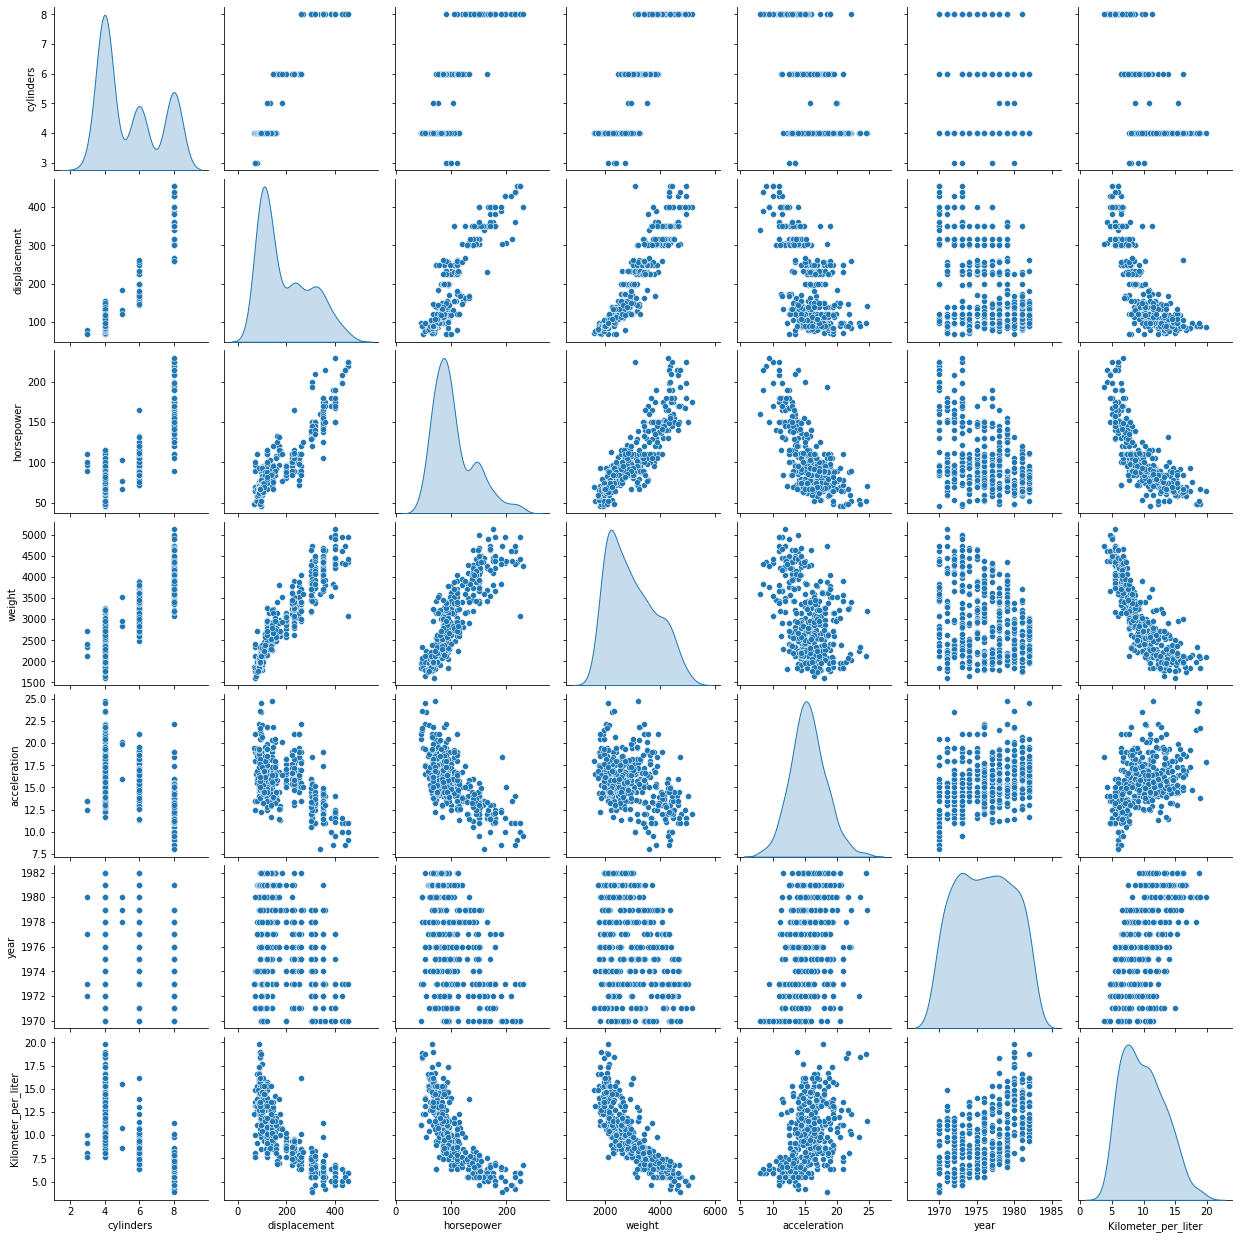

In [17]:
vehicle_df_attr = vehicle_df.iloc[:, 0:7]
sns.pairplot(vehicle_df_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [37]:
# lets build our linear model
# independant variables
X = vehicle_df.drop(['Kilometer_per_liter'],axis=1)
# the dependent variable
y = vehicle_df[['Kilometer_per_liter']]

In [19]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [20]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [21]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model.coef_[0][idx]))

The coefficient for cylinders is -0.16785012245832126
The coefficient for displacement is 0.012306001760302237
The coefficient for horsepower is -0.0092478142363823
The coefficient for weight is -0.0031256701693229854
The coefficient for acceleration is 0.026324628826210738
The coefficient for year is 0.355817177618806
The coefficient for origin_america is -0.7647694799978446
The coefficient for origin_asia is 0.25356237793773906
The coefficient for origin_europe is 0.5112071020601053


In [22]:
intercept = reg_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -684.336938770026


In [23]:
reg_model.score(X_train, y_train)

0.8141025501610561

In [24]:
reg_model.score(X_test, y_test)

0.8433135132808796

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9020728050454867


In [26]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8659110087604838


In [27]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 9)
(278, 46)


In [28]:
len(y_test)


120

In [29]:
len(X_test)

120

In [42]:
print(X.shape)

(398, 9)


In [44]:
print(y.shape)

(398, 1)


In [45]:
X_train=np.arange(0,len(X_train),1)

In [47]:
print(y.shape)

(398, 1)


ValueError: Expected 2D array, got 1D array instead:
array=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

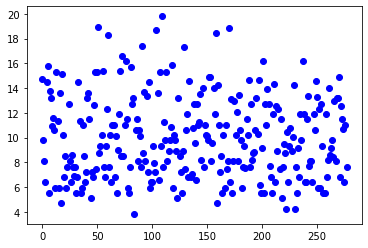